# Time-Series Plots (Complete Guide with Dynamic Python Code)

Covers:

1️⃣ Line Plot

2️⃣ Multiple Time-Series

3️⃣ Subplots (Multi-Panel Time-Series)

4️⃣ Rolling Statistics Plot

5️⃣ Seasonal Decomposition Plot

6️⃣ Lag Plot

7️⃣ Autocorrelation (ACF) & Partial ACF

8️⃣ Time-Series Heatmap

9️⃣ Time-Series Scatter Plot

🔟 Time-Series with Events / Annotations

1️⃣1️⃣ Time-Series Forecast Plots (ARIMA/FbProphet style)

All code uses:

✔ pandas

✔ matplotlib

✔ seaborn

✔ statsmodels

✔ plotly (For interactive versions)

## Dataset Setup (Use this for ALL plots)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Create synthetic time-series data
dates = pd.date_range(start="2020-01-01", periods=500, freq="D")
data = pd.DataFrame({
    "date": dates,
    "sales": np.random.normal(loc=200, scale=20, size=500).cumsum(),
    "temp": 20 + 10 * np.sin(np.linspace(0, 20, 500)) + np.random.normal(0, 1, 500),
    "traffic": np.random.randint(100, 500, size=500)
})

data.set_index("date", inplace=True)
data.head()


,sales,temp,traffic
date,,,
2020-01-01,197.232728,18.893556,200
2020-01-02,392.376567,20.633783,133
2020-01-03,615.305741,21.083482,200
2020-01-04,791.374656,22.744392,175
2020-01-05,1021.432860,20.726332,144


## Simple Time-Series Line Plot

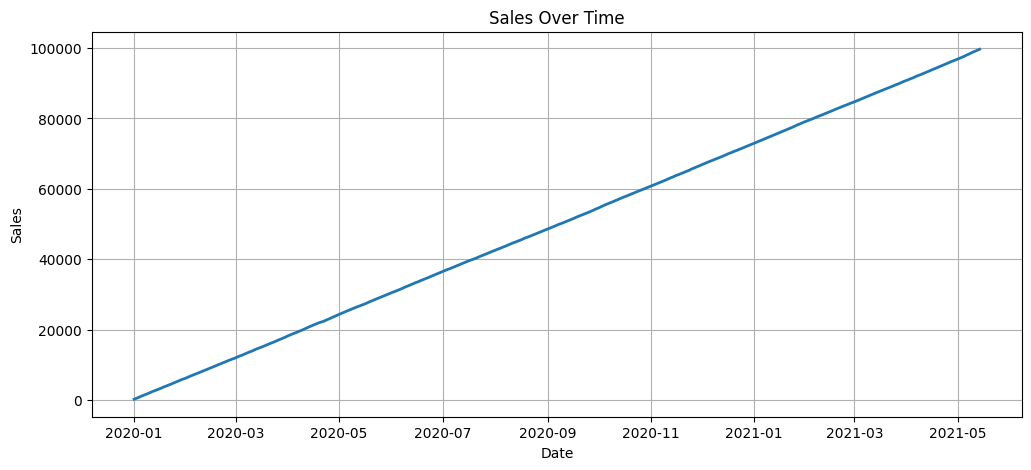

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data["sales"], linewidth=2)
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


## Multiple Time-Series on Same Chart

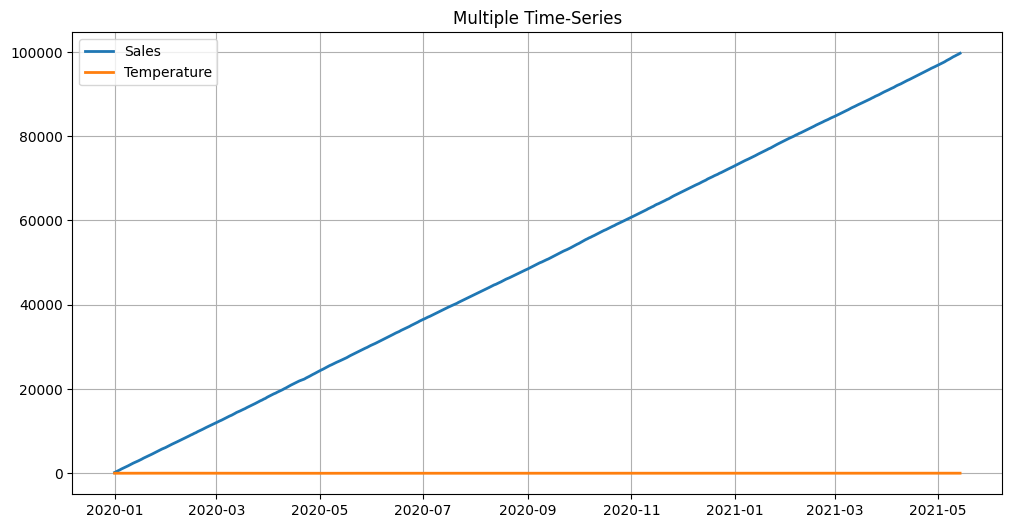

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["sales"], label="Sales", linewidth=2)
plt.plot(data.index, data["temp"], label="Temperature", linewidth=2)
plt.title("Multiple Time-Series")
plt.legend()
plt.grid()
plt.show()

## Subplots (Multi-Panel Time-Series)

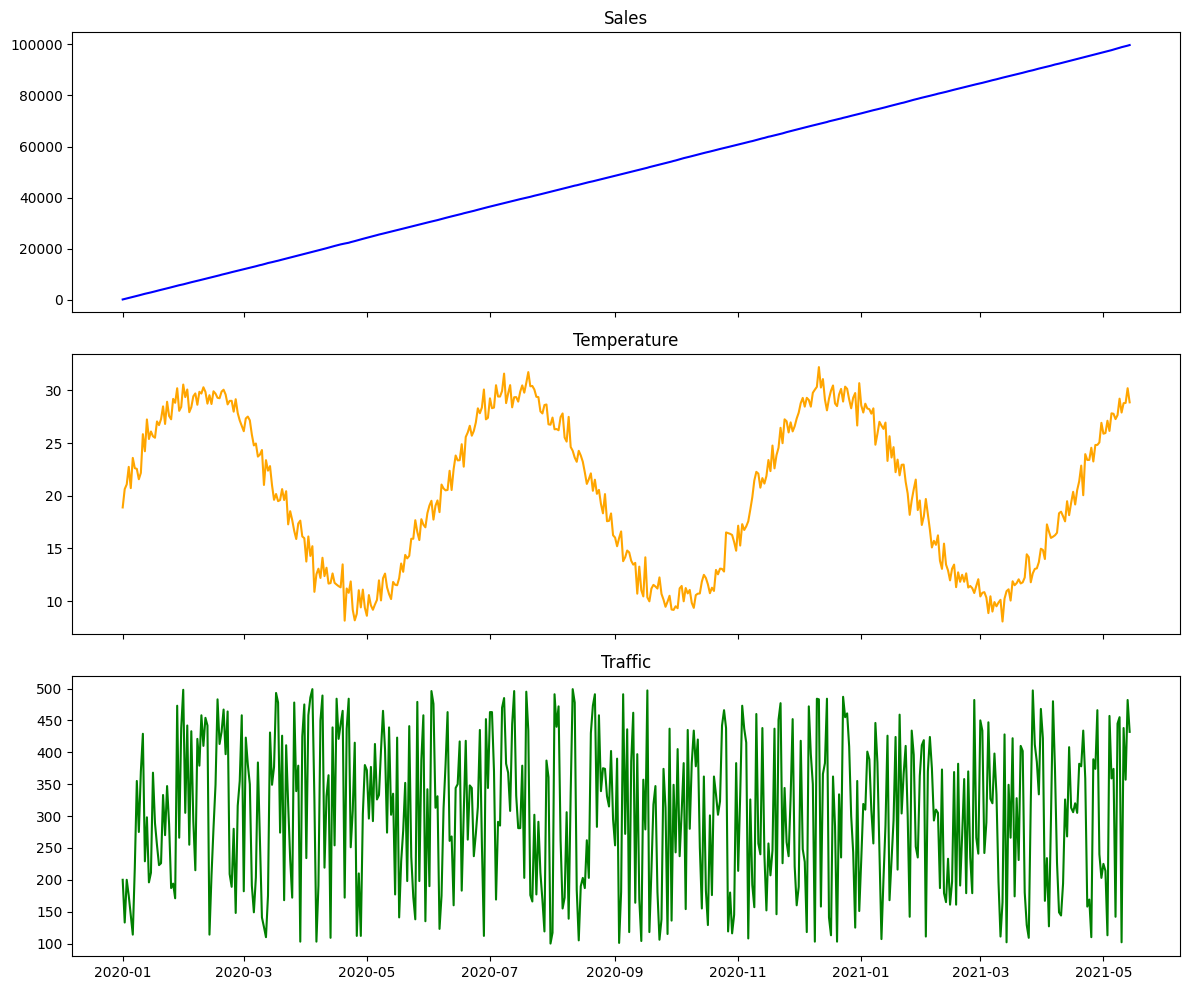

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

ax[0].plot(data.index, data["sales"], color="blue")
ax[0].set_title("Sales")

ax[1].plot(data.index, data["temp"], color="orange")
ax[1].set_title("Temperature")

ax[2].plot(data.index, data["traffic"], color="green")
ax[2].set_title("Traffic")

plt.tight_layout()
plt.show()


## Rolling Statistics Plot (Moving Average & Std)

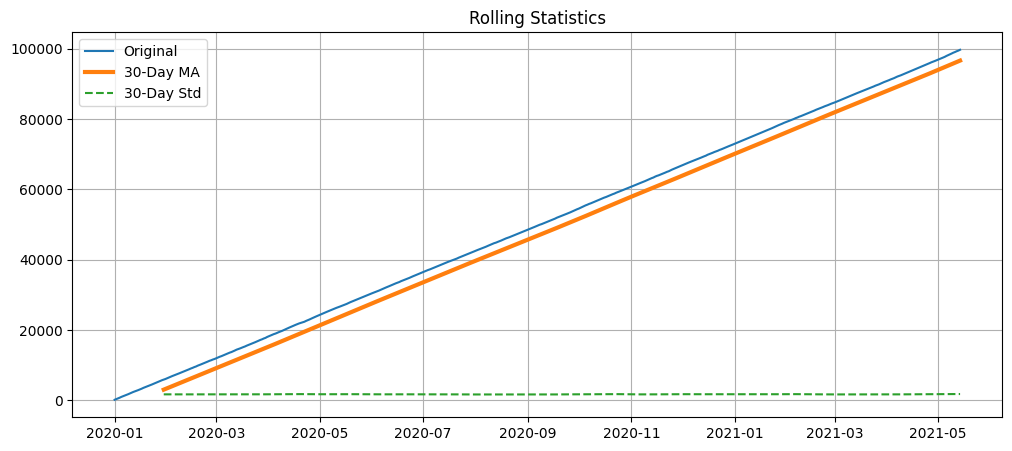

In [7]:
data["rolling_mean"] = data["sales"].rolling(30).mean()
data["rolling_std"] = data["sales"].rolling(30).std()

plt.figure(figsize=(12,5))
plt.plot(data.index, data["sales"], label="Original")
plt.plot(data.index, data["rolling_mean"], label="30-Day MA", linewidth=3)
plt.plot(data.index, data["rolling_std"], label="30-Day Std", linestyle="--")
plt.legend()
plt.title("Rolling Statistics")
plt.grid()
plt.show()


## Seasonal Decomposition Plot

In [9]:
! pip install statsmodels

  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
   ---------------------------------------- 9.6/9.6 MB 5.0 MB/s  0:00:02
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)



In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(data["temp"], model="additive", period=30)

fig = decomp.plot()
fig.set_figwidth(12)
fig.set_figheight(10)
plt.show()


ModuleNotFoundError: No module named 'statsmodels'

## Lag Plot (Check Autocorrelation)

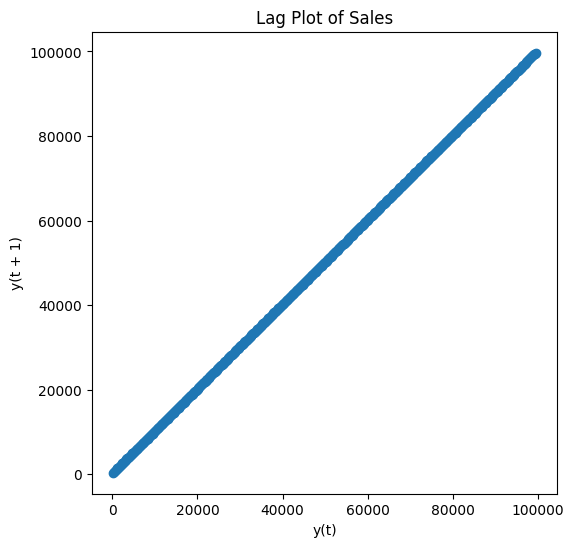

In [10]:
from pandas.plotting import lag_plot

plt.figure(figsize=(6,6))
lag_plot(data["sales"])
plt.title("Lag Plot of Sales")
plt.show()

## Autocorrelation (ACF) and Partial ACF (PACF)

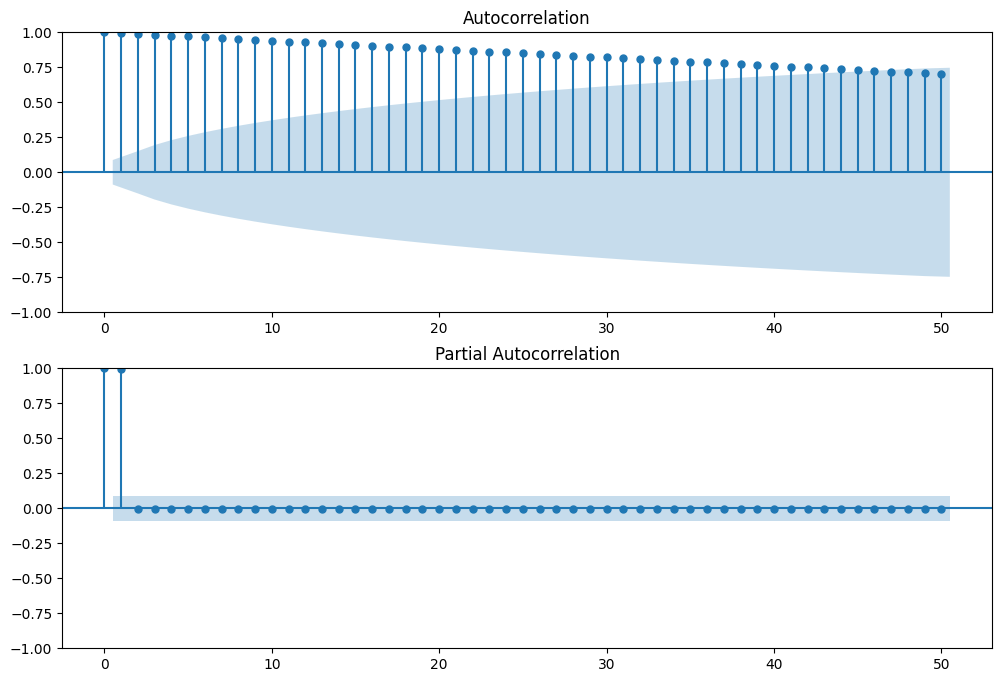

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(data["sales"], ax=ax[0], lags=50)
plot_pacf(data["sales"], ax=ax[1], lags=50)
plt.show()


## Time-Series Heatmap (Day × Month)

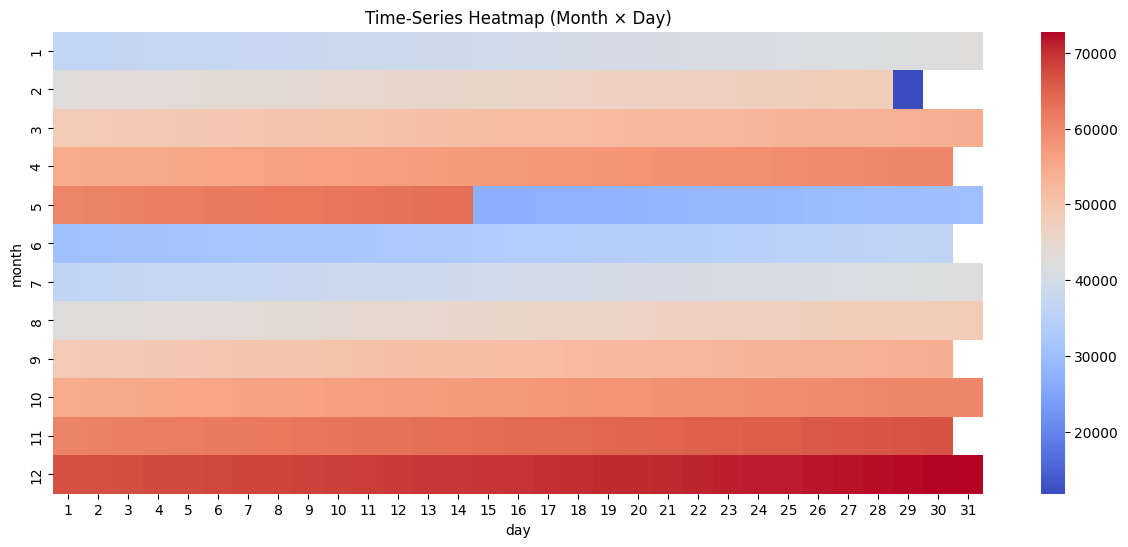

In [12]:
heatmap_data = data.copy()
heatmap_data["month"] = heatmap_data.index.month
heatmap_data["day"] = heatmap_data.index.day

pivot = heatmap_data.pivot_table(
    values="sales", index="month", columns="day", aggfunc="mean"
)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot, cmap="coolwarm")
plt.title("Time-Series Heatmap (Month × Day)")
plt.show()


## Time-Series Scatter Plot

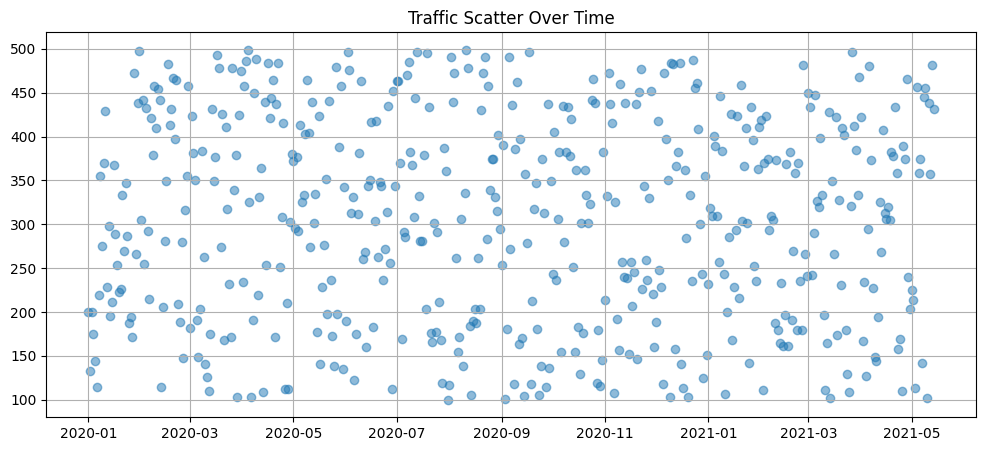

In [13]:
plt.figure(figsize=(12,5))
plt.scatter(data.index, data["traffic"], alpha=0.5)
plt.title("Traffic Scatter Over Time")
plt.grid()
plt.show()


## Time-Series with Events / Annotations

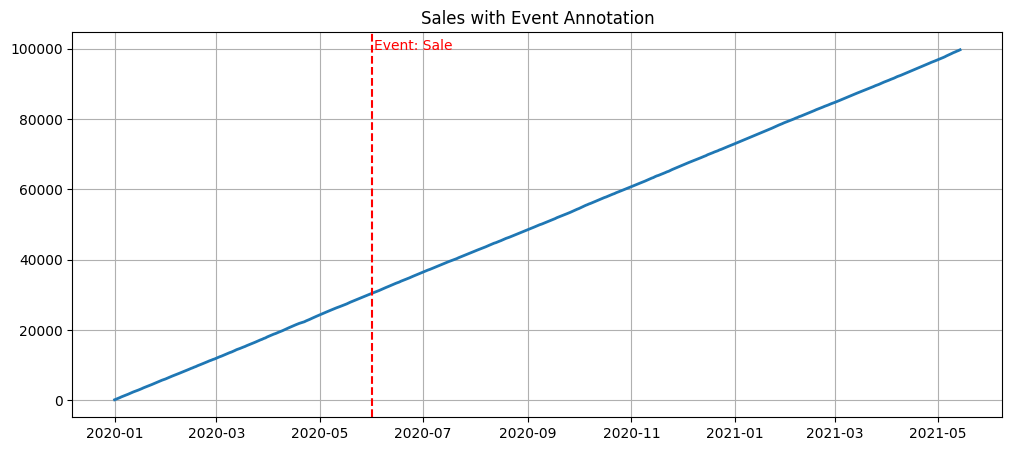

In [14]:
plt.figure(figsize=(12,5))
plt.plot(data.index, data["sales"], linewidth=2)

plt.axvline(pd.Timestamp("2020-06-01"), color="red", linestyle="--")
plt.text(pd.Timestamp("2020-06-02"), data["sales"].max(), "Event: Sale", color="red")

plt.title("Sales with Event Annotation")
plt.grid()
plt.show()


## Forecast Plot (ARIMA Example)

c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


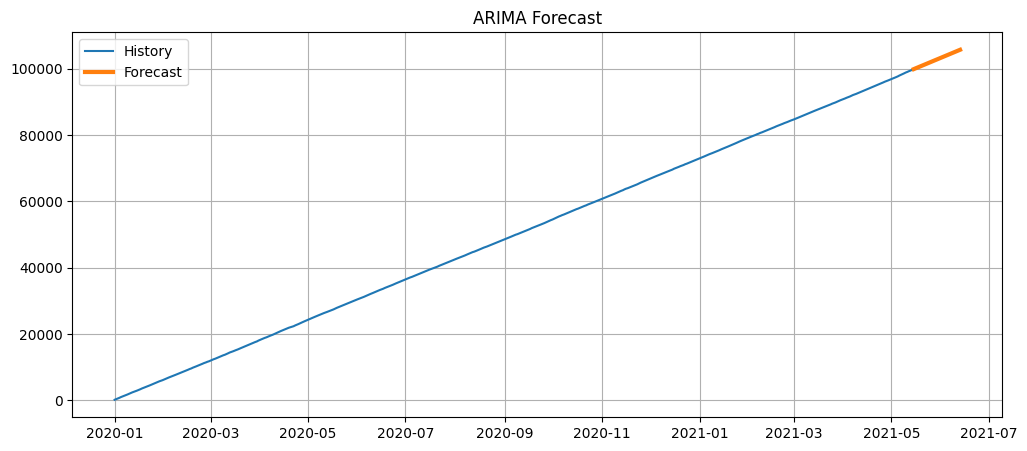

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["sales"], order=(5,1,2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(12,5))
plt.plot(data.index, data["sales"], label="History")
plt.plot(forecast.index, forecast, label="Forecast", linewidth=3)
plt.legend()
plt.title("ARIMA Forecast")
plt.grid()
plt.show()


## BONUS: Interactive Plotly Time-Series

In [16]:
import plotly.express as px

fig = px.line(data.reset_index(), x="date", y=["sales", "temp", "traffic"],
              title="Interactive Time-Series")
fig.show()
